# Notebook: "Data cleaning and overview"
## coded by Jörg (group13)

### The purpose

#### This notebook serves to give an overview of the data and exclude unrepresentative data. As the harvest amount per crop item varies dramatically among countries, we consider the weight [t] (calculated by dividing total water consumption [m³] by unit water footprint [m³/t]). uWF values for which the weight lies below the 5th percentile of the weight are excluded. Some of these values might distort our analysis results otherwise.

In [1]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# read in uWF/WF data, downloaded from watertofood.org 
path = "/home/jburdano/projects/uWF101/"
fil =  "watertofood_uWF_15crops_15countries_1960-2016.csv" 
fil2 =  "watertofood_WF_15crops_15countries_1960-2016.csv" 
df = pd.read_csv(path+fil, ";",header=1)
df2 = pd.read_csv(path+fil2, ";",header=1)

# set zero values to nan-values
df = df.mask(df==0)    
df2 = df2.mask(df2==0)    # set zero values to nan-values

# create weight data of items weight=WF/uWF
df_weight = df.copy()
df_weight.iloc[:,7:] = df2.iloc[:,7:].div(df.iloc[:,7:]).round()

#short overview of data
display(df_weight.head())
display(df.head())
display(df2.head())

,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,11,AT,Apples,515,Fruits,m3/ton,456000.0,431000.0,436001.0,...,477882.0,551356.0,485609.0,270804.0,302809.0,262108.0,234584.0,310340.0,287599.0,101667.0
1,Austria,11,AT,Asparagus,367,Vegetables,m3/ton,150.0,171.0,134.0,...,2447.0,2281.0,2479.0,1919.0,2464.0,3295.0,2604.0,2519.0,2459.0,2568.0
2,Austria,11,AT,Carrots and turnips,426,Vegetables,m3/ton,14510.0,12305.0,18256.0,...,74246.0,80849.0,83587.0,85631.0,109044.0,98272.0,95501.0,106943.0,66760.0,98476.0
3,Austria,11,AT,Cherries,531,Fruits,m3/ton,36029.0,30722.0,31126.0,...,33890.0,26790.0,30276.0,5103.0,9252.0,5028.0,7851.0,7397.0,6732.0,3533.0
4,Austria,11,AT,"Chillies and peppers, green",401,Vegetables,m3/ton,5257.0,5446.0,7222.0,...,14701.0,17693.0,17855.0,14682.0,16047.0,17280.0,18355.0,18601.0,15860.0,14547.0


,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,11,AT,Apples,515,Fruits,m3/ton,67.596703,67.490303,67.621696,...,155.539001,173.072998,176.309998,145.723999,160.794998,302.752991,177.143005,157.955994,132.710007,251.289993
1,Austria,11,AT,Asparagus,367,Vegetables,m3/ton,1601.750000,1525.469971,1690.540039,...,1422.300049,1414.449951,1329.170044,1745.650024,1409.689941,1252.089966,1606.729980,1680.609985,1756.510010,2152.719971
2,Austria,11,AT,Carrots and turnips,426,Vegetables,m3/ton,148.216995,146.811996,135.082001,...,95.588402,88.136299,87.707802,90.581497,75.778297,80.972298,84.542801,77.037201,116.822998,88.053802
3,Austria,11,AT,Cherries,531,Fruits,m3/ton,562.728027,415.609985,617.362000,...,589.810974,746.117981,660.210022,685.169006,689.297974,697.112000,694.752014,692.406006,690.057007,687.744019
4,Austria,11,AT,"Chillies and peppers, green",401,Vegetables,m3/ton,209.169998,211.339005,185.434998,...,47.731300,41.110500,39.060101,46.044498,43.460999,42.093102,40.094002,40.202702,46.184299,49.357101


,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,11,AT,Apples,515,Fruits,m3,30824100.0,29088300.0,29483100.0,...,74329296.0,95424800.0,85617696.0,39462700.0,48690200.0,79354000.0,41555000.0,49020000.0,38167200.0,25547900.0
1,Austria,11,AT,Asparagus,367,Vegetables,m3,240262.0,260855.0,226532.0,...,3480380.0,3226360.0,3295000.0,3349910.0,3473470.0,4125650.0,4183930.0,4233450.0,4319250.0,5528200.0
2,Austria,11,AT,Carrots and turnips,426,Vegetables,m3,2150630.0,1806520.0,2466050.0,...,7097060.0,7125730.0,7331230.0,7756590.0,8263170.0,7957310.0,8073920.0,8238590.0,7799070.0,8671180.0
3,Austria,11,AT,Cherries,531,Fruits,m3,20274500.0,12768400.0,19216000.0,...,19988700.0,19988500.0,19988500.0,3496420.0,6377380.0,3505080.0,5454490.0,5121730.0,4645470.0,2429800.0
4,Austria,11,AT,"Chillies and peppers, green",401,Vegetables,m3,1099610.0,1150950.0,1339210.0,...,701697.0,727369.0,697418.0,676025.0,697418.0,727368.0,735926.0,747811.0,732482.0,717997.0


In [18]:
# bring weight df in short format with columns Years,Item Name,Country Name,Item Category,Weight,uWF
df_weight_p = pd.pivot_table(df_weight, values=df_weight.iloc[:,7:], 
                             index=None, columns=["Item Name","Country Name","Item Category"])
df_short = pd.DataFrame(df_weight_p.stack(level=0).stack(level=0).stack(level=0))
df_short.reset_index(level=[0,1,2,3],inplace=True)
df_short.columns = ['Years', 'Item Name', 'Country Name',"Item Category", 'Weight_t']
df_short["Years"]=df_short["Years"].astype(int)

# same for uWF to later merge both columns to df
dftest = pd.pivot_table(df, values=df.iloc[:,7:], index=None, columns=["Item Name","Country Name","Item Category"])#.xs("1961")
dftest.index.name = "Years"
dfpl = pd.DataFrame(dftest.stack(level=0).stack(level=0).stack(level=0))
dfpl.reset_index(level=[0,1,2,3],inplace=True)
dfpl.columns = ['Years', 'Item Name', 'Country Name', "Item Category", 'uWF']
dfpl["Years"]=dfpl["Years"].astype(int)


# add uWF to weight df and other cat columns
df_short["uWF"] = dfpl["uWF"]

display(df_short.shape)
display(df_short.describe())
df_short.head(5)

(10598, 6)

,Years,Weight_t,uWF
count,10598.000000,1.059800e+04,10598.000000
mean,1989.743537,1.146418e+06,622.868877
std,16.297371,3.377947e+06,1192.842142
min,1961.000000,7.000000e+00,2.752980
25%,1976.000000,3.558325e+04,127.465248
50%,1990.000000,1.753900e+05,268.794495
75%,2004.000000,7.316800e+05,671.952255
max,2016.000000,5.192829e+07,32257.000000


,Years,Item Name,Country Name,Item Category,Weight_t,uWF
0,1961,Apples,Austria,Fruits,456000.0,67.596703
1,1961,Apples,France,Fruits,2141999.0,314.213013
2,1961,Apples,Germany,Fruits,851001.0,147.557999
3,1961,Apples,Greece,Fruits,196000.0,1032.219971
4,1961,Apples,Hungary,Fruits,349500.0,793.695984


### Data cleaning --> set unrepresentative values to NaN based on weight

In [20]:
# exclude unrepresentative uWF values due to relatively low harvest weights 
# (<5th percentile of weight) for each category
item_cats = list(df_short["Item Category"].unique())
for cat in item_cats:
    mask_cat = df_short["Item Category"]==cat
    perc5_WF = np.percentile(df_short.loc[mask_cat,"Weight_t"],5)
    mask = (mask_cat) & (df_short["Weight_t"] < perc5_WF)
    df_short.loc[mask,"uWF"] = np.nan
    print("NaNs total in uWF: ",df_short["uWF"].isna().sum())


NaNs total in uWF:  182
NaNs total in uWF:  472
NaNs total in uWF:  508


### Save data to CSV-File

In [22]:
# save cleaned data in short format to csv in path of input data
df_short.to_csv(path+"watertofood_uWF-weight_15crops_15countries_1960-2016_5perc.csv")
    #watertofood_uWF-weight_allcrops_15countries_1960-2016_5perc.csv

### Some plots follow to illustrate the general data statistics

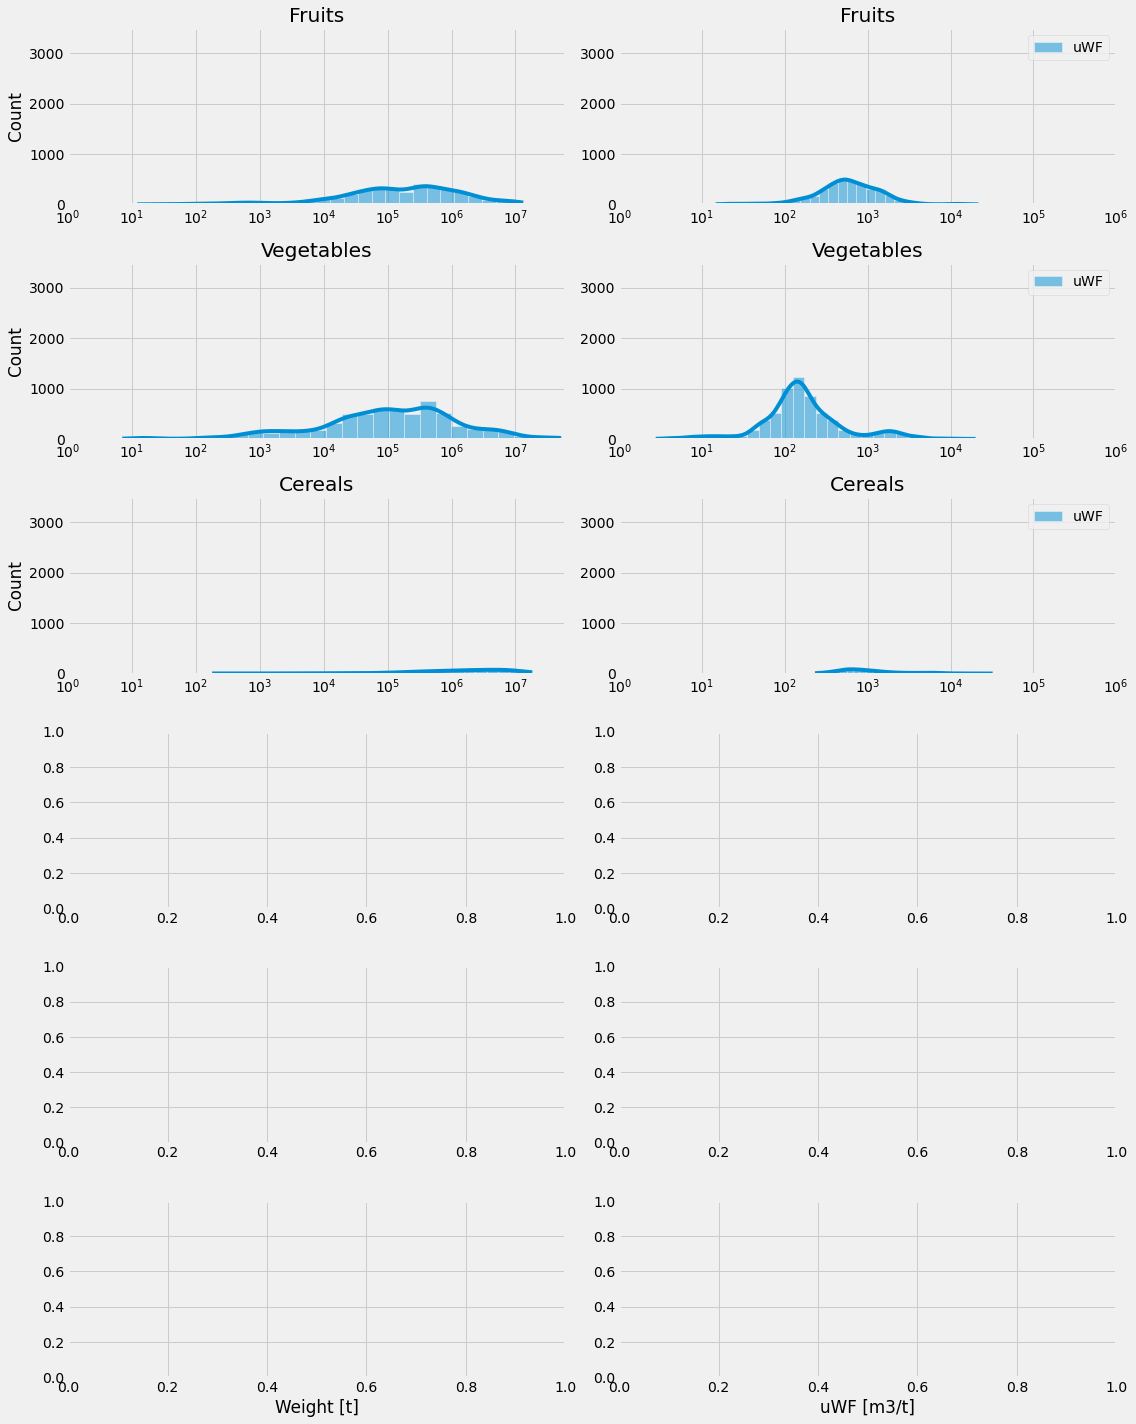

In [19]:
# plot histograms for weight and uWF for each item category
item_cats = list(df_short["Item Category"].unique())
plt.style.use("fivethirtyeight")
fig,ax = plt.subplots(6,2,figsize=[16,20])
cnt = 0

for i in item_cats:
    sns.histplot(df_short.loc[df_short["Item Category"]==i,"Weight_t"],bins=28,
                 kde=True,log_scale=True,ax=ax[cnt,0]);
    sns.histplot(df_short.loc[df_short["Item Category"]==i,["uWF"]],bins=28,
                 kde=True,log_scale=True,ax=ax[cnt,1],color=cnt);
    ax[cnt,0].set_title(i)
    ax[cnt,1].set_title(i)
    ax[cnt,0].set_xlabel("");
    ax[5,0].set_xlabel("Weight [t]");
    ax[5,1].set_xlabel("uWF [m3/t]");
    ax[cnt,0].set_xlim(1,6*10**7)
    ax[cnt,0].set_ylim(0,3500)
    ax[cnt,1].set_xlim(1,10**6)
    ax[cnt,1].set_ylim(0,3500)
    ax[cnt,1].set_ylabel("")
    cnt+=1
plt.tight_layout()

In [29]:
# prepare df with log-log weight vs. uWF for pairplot
df_weight_uWF = df_short.copy()
df_weight_uWF["Weight_log"] = np.log(df_short["Weight_t"])
df_weight_uWF["uWF_log"] = np.log(df_short["uWF"])
del df_weight_uWF["uWF"]
del df_weight_uWF["Weight_t"]

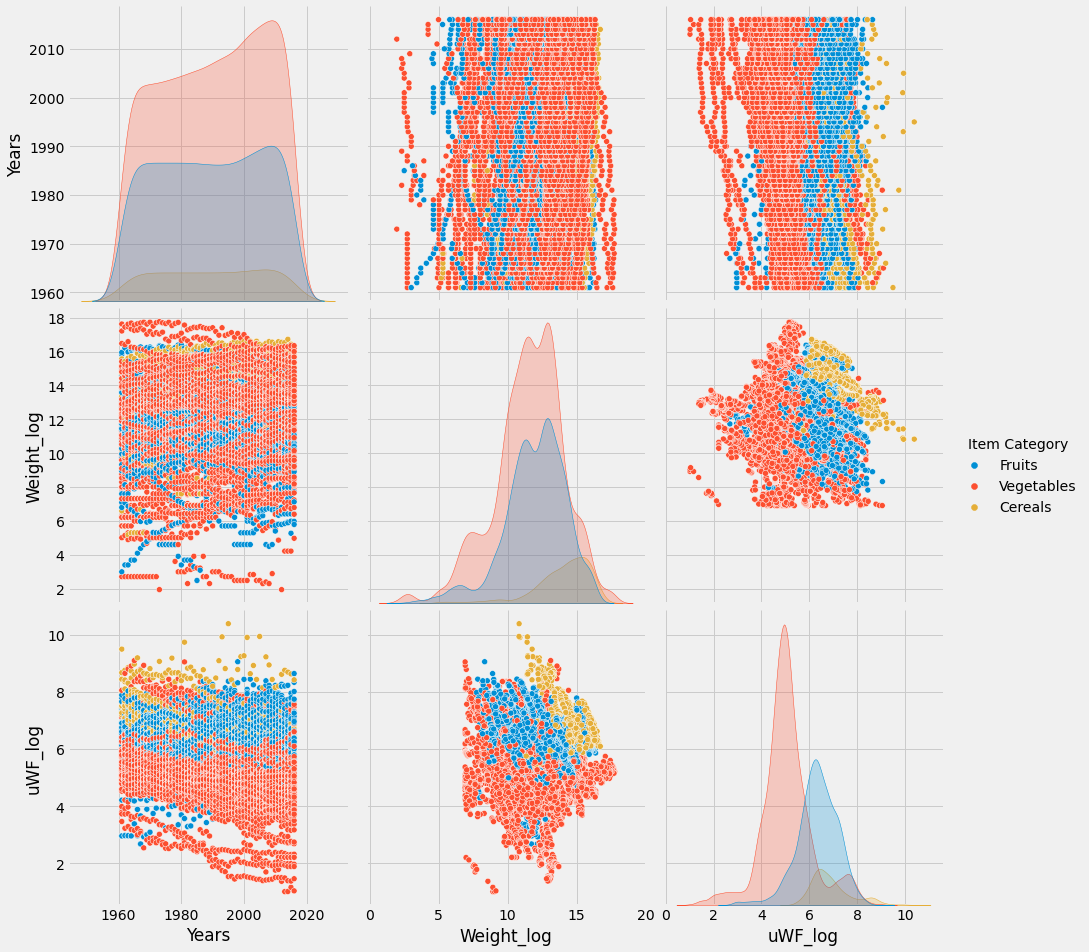

In [30]:
# Pairplot in log-log space for uWF and weight
sns.pairplot(df_weight_uWF, hue="Item Category",height=4.5);


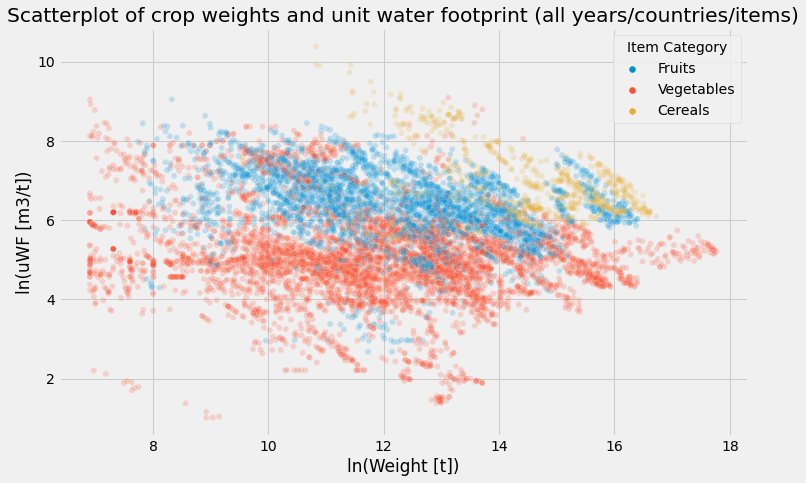

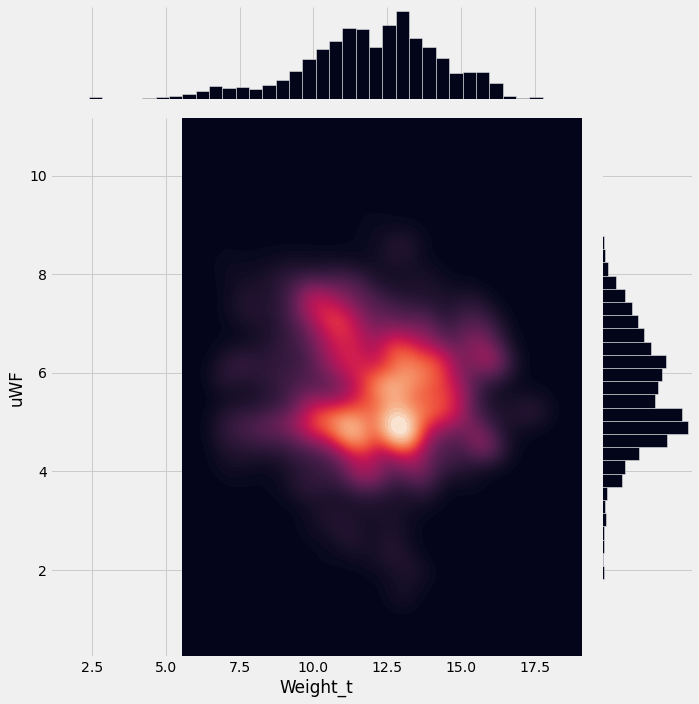

In [33]:
# Different view on data w/ scatter plot and 2d-histogram
fig,ax = plt.subplots(figsize=[11,7])
sns.scatterplot(x=np.log(df_short["Weight_t"]), 
                y=np.log(df_short["uWF"]),hue=df_short["Item Category"],alpha=.2,ax=ax);
ax.set(title="Scatterplot of crop weights and unit water footprint (all years/countries/items)",
      xlabel="ln(Weight [t])",ylabel="ln(uWF [m3/t])");

g = sns.JointGrid(x=np.log(df_short["Weight_t"]), 
                y=np.log(df_short["uWF"]),height=10)
g.plot_joint(sns.kdeplot, fill=True, 
             thresh=0, levels=100, cmap="rocket") #clip=((2200, 6800), (10, 25))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=35);


In [34]:
"""Check whether log-distributions are normally distributed"""
print("       ________mean vs. median________\n",
      np.exp((np.log(df_short["Weight_t"])).mean()),"vs.",
      np.exp((np.log(df_short["Weight_t"])).median()),
     "\n",np.exp((np.log(df_short["uWF"])).mean()),"vs.",
      np.exp((np.log(df_short["uWF"])).median()) )
# Yes --> almost normal distributions in log-log space --> we could use mean and std for outlier detection!

# Find limits for 3*sigma (NOT used for outlier detection)
print("\nLower limit of 3sigma (WF): ",
      np.exp(np.log(df_short["Weight_t"]).mean() - 3*np.log(df_short["Weight_t"]).std()).round(2),
      "t \n","Upper limit of 3sigma (uWF): ",
      np.exp(np.log(df_short["uWF"]).mean() + 3*np.log(df_short["uWF"]).std()).round(),"m3/t" )

print((df_short.loc[:,"uWF"]>10232).sum(), df_short.loc[:,"uWF"].shape)

       ________mean vs. median________
 140164.12148441205 vs. 175389.98795541344 
 276.6526042060635 vs. 258.12194858957986

Lower limit of 3sigma (WF):  84.93 t 
 Upper limit of 3sigma (uWF):  10252.0 m3/t
7 (10598,)


In [ ]:
for i in range(len(item_cats)):
    print("___", item_cats[i],":")
    mask = df_short.loc[:,"Item Category"]==item_cats[i]
    mask2 = df_short.loc[:,"Item Category"]==item_cats[i]
    print("Lower limit of 2sigma (WF): ",
      np.exp(np.log(df_short.loc[mask,"Weight_t"]).mean() - 2*np.log(df_short.loc[mask,"Weight_t"]).std()).round(2),
      "t \n","Upper limit of 2sigma (uWF): ",
      np.exp(np.log(df_short.loc[mask2,"uWF"]).mean() + 2*np.log(df_short.loc[mask,"uWF"]).std()).round(),"m3/t \n" )

In [ ]:
for i in range(len(item_cats)):
    print("___", item_cats[i],":")
    mask = df_short.loc[:,"Item Category"]==item_cats[i]
    print("5th percentile (WF): ",
      (np.percentile(df_short.loc[mask,"Weight_t"],5)).round(2),
      "t","\n95th percentile (uWF): ",
      (np.percentile(df_short.loc[mask,"uWF"],99)).round(1),"m3/t \n" )

In [9]:
mask = (df_short.loc[:,"Item Name"]=="Maize") & (df_short.loc[:,"Country Name"]=="Morocco")
print(df_short.loc[mask,["Years","Weight_t","uWF","Item Category"]])
print("Lower limit of 3sigma (WF): ",
      np.exp(np.log(df_short.loc[mask,"Weight_t"]).mean() - 3*np.log(df_short.loc[mask,"Weight_t"]).std()).round(2),
      "t \n","Upper limit of 3sigma (uWF): ",
      np.exp(np.log(df_short.loc[mask,"uWF"]).mean() + 3*np.log(df_short.loc[mask,"uWF"]).std()).round(),"m3/t \n" )

       Years  Weight_t           uWF Item Category
421     1961  130000.0  13254.799805       Cereals
1304    1962  420001.0   4503.470215       Cereals
2184    1963  480001.0   4027.870117       Cereals
3063    1964  399999.0   4833.359863       Cereals
3942    1965  330001.0   5477.049805       Cereals
4820    1966  218500.0   9772.349609       Cereals
5699    1967  356499.0   6272.330078       Cereals
6575    1968  379999.0   5530.379883       Cereals
7452    1969  429999.0   4496.240234       Cereals
8328    1970  319600.0   6706.700195       Cereals
9199    1971  389899.0   4883.339844       Cereals
10072   1972  367579.0   5498.540039       Cereals
10943   1973  217299.0   8634.120117       Cereals
11816   1974  389000.0   4832.799805       Cereals
12688   1975  370700.0   5575.129883       Cereals
13558   1976  492499.0   3684.979980       Cereals
14435   1977  184270.0   9682.299805       Cereals
15313   1978  390359.0   4246.399902       Cereals
16191   1979  311619.0   5604.1

In [41]:
# Top list per country and item
print(list(df_short["Country Name"].unique()),"\n")
print(df_short.groupby("Country Name").agg('mean').iloc[:,-1].sort_values().round(),"\n")
print(df_short.groupby("Item Name").agg('mean').iloc[:,-1].dropna().sort_values().round())

['Austria', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain', 'Turkey', 'Belgium', 'Serbia'] 

Country Name
Belgium         204.0
Netherlands     211.0
Austria         298.0
Italy           426.0
France          436.0
Germany         452.0
Turkey          459.0
Poland          477.0
Greece          559.0
Hungary         559.0
Serbia          616.0
Romania         649.0
Spain           685.0
Portugal        848.0
Morocco        1292.0
Name: uWF, dtype: float64 

Item Name
Tomatoes                        125.0
Lettuce and chicory             156.0
Mushrooms and truffles          158.0
Cucumbers and gherkins          174.0
Carrots and turnips             176.0
Chillies and peppers, green     182.0
Potatoes                        218.0
Pumpkins, squash and gourds     283.0
Apples                          447.0
Pears                           536.0
Peaches and nectarines          718.0
Grapes                          779.0

In [ ]:
item_cats = list(df["Item Category"].unique())
print(item_cats)

item_cats_item_names = {}
for item_cat in item_cats:
    item_cats_item_names[item_cat] = list(df.loc[df.loc[:,"Item Category"] == item_cat,"Item Name"].unique())
    print(item_cat, "has", len(item_cats_item_names[item_cat]), "items \n")

print("\n\n\n\n")    
item_cats_item_names   

In [26]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10598 entries, 0 to 10597
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Years          10598 non-null  int64  
 1   Item Name      10598 non-null  object 
 2   Country Name   10598 non-null  object 
 3   Item Category  10598 non-null  object 
 4   Weight_t       10598 non-null  float64
 5   uWF            10090 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 496.9+ KB


## Start Plotting: Histogram-like panel plot

In [36]:
# Set general plotting options
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)
pal = sns.color_palette("viridis", len(dfpl["Years"].unique()))


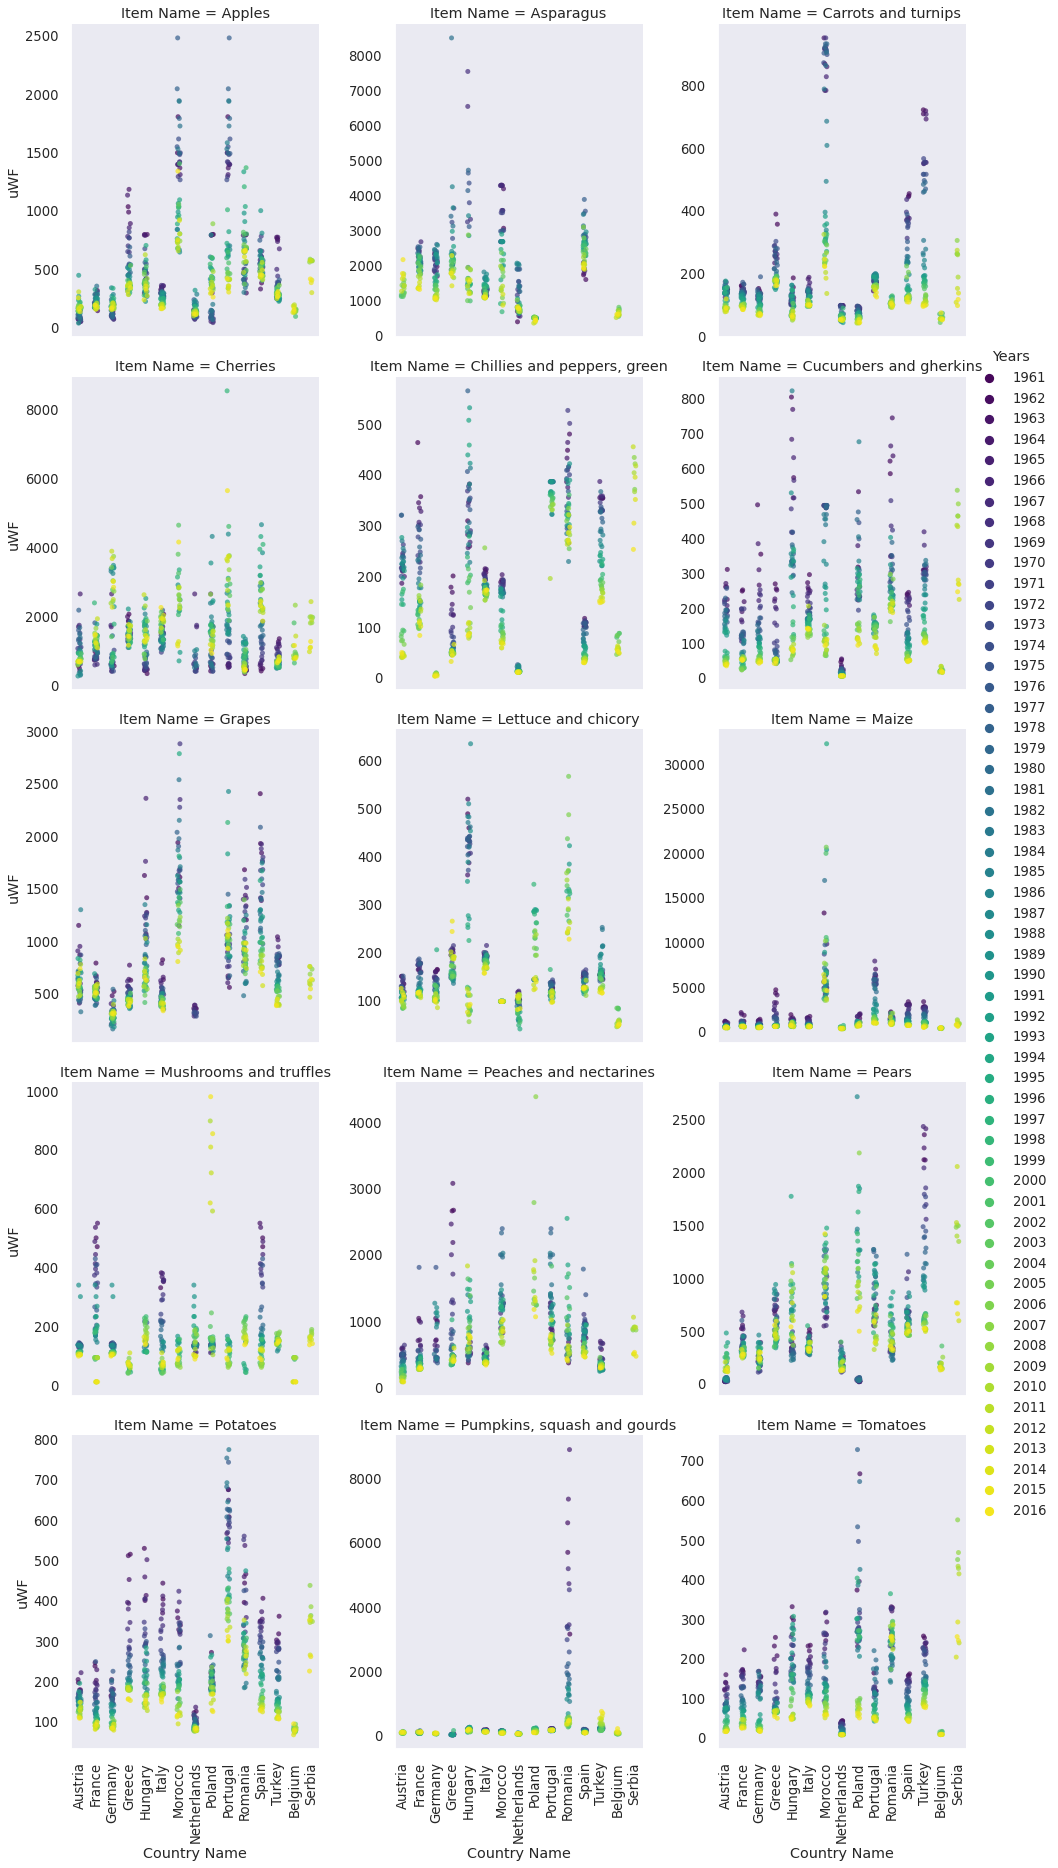

In [38]:
# temporal evolution of uWF for each item and all 15 countries (color=years)
g=sns.catplot(x="Country Name", y="uWF", hue="Years",
            col="Item Name", col_wrap=3, aspect=.9, sharey=False,
            kind="strip", data=df_short, alpha = .7, palette=pal);
g.set_xticklabels(rotation=90);

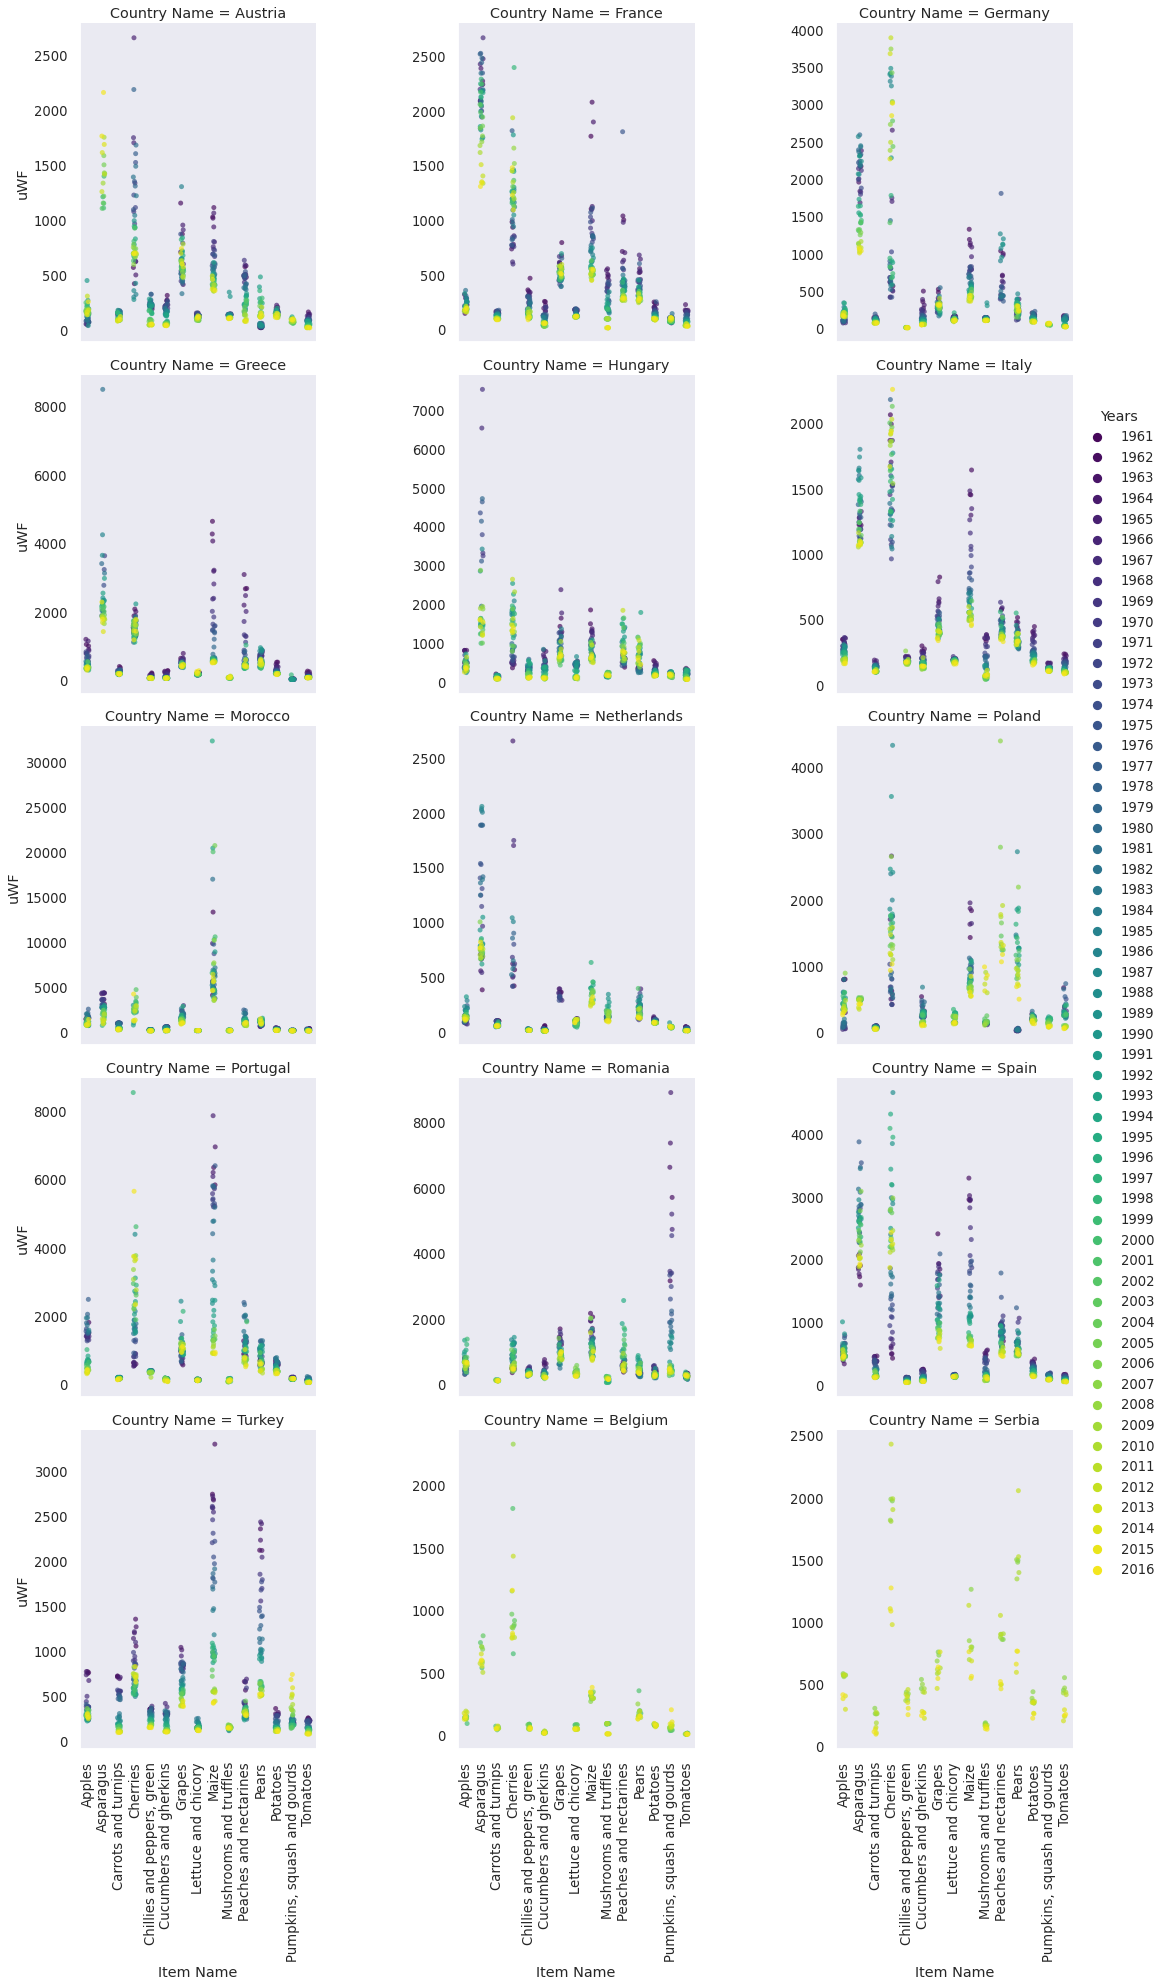

In [42]:
# temporal evolution of uWF for each country and all 15 items (color=years)
g = sns.catplot(x="Item Name", y="uWF", hue="Years",
            col="Country Name", col_wrap=3, aspect=1.0, sharey=False,
            kind="strip", data=df_short, palette=pal, alpha = .68);
g.set_xticklabels(rotation=90);